In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import csv
from dateutil import parser

In [96]:
fnames = pd.read_csv('separated/gameslist.csv').ix[:,0]
gamedatadict = {}

for game in fnames:
    df = pd.read_csv('separated/{0}'.format(game), encoding='utf-8', error_bad_lines=False)
    try:
        df['time'] = df['time'].apply(lambda x:parser.parse(x))
        df.index = df['time']
        gamedatadict[game] = df
    except Exception as e:
        print e
        print game
        continue

'float' object has no attribute 'read'
GonzagaSyracuse.csv
'float' object has no attribute 'read'
OregonOkla.csv
'float' object has no attribute 'read'
TexasNorthernIowa.csv
'time'
gameslist.csv


In [97]:
def by_minute_plot(gamefile):
    df = gamedatadict[gamefile]
    grouped = df.groupby(df.index.map(lambda t: t.minute)).count()
    plt.plot(grouped)

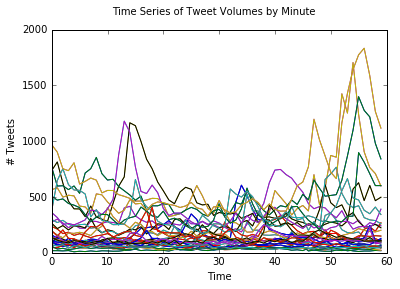

In [106]:
plt.figure()
for game in gamedatadict.keys():
    by_minute_plot(game)

plt.suptitle('Time Series of Tweet Volumes by Minute')
plt.xlabel('Time')
plt.ylabel('# Tweets')
plt.savefig('milestone2/tweetvolues.pdf')